# Изучение рынка заведений общественного питания Москвы

- Автор: Зайцев Виталий
- Дата: 18.06.2025

### Цели и задачи проекта

Цель исследования - помочь инвесторам определиться с местом для открытия своего заведения общественного питания, и помочь выбрать его формат.

Задачи исследования:

1. Определить, какие категории заведений представлены в данных, исследовать кол-во объектов по каждой категории.
2. Исследовать распределение количества заведений по административным районам Москвы, а также отдельно распределение заведений каждой категории в ЦАО Москвы.
3. Изучить соотношение сетевых и несетевых заведений в целом по всем данным и в разрезе категорий заведения.
4. Изучить количество посадочных мест в заведениях.
5. Исследовать рейтинг заведений.
6. Изучить, с какими данными показывают самую сильную корреляцию рейтинги заведений.
7. Найти топ-15 популярных сетей в Москве.
8. Изучить вариацию среднего чека заведения (столбец middle_avg_bill) в зависимости от района Москвы.

### Описание данных



Нам предоставлен датасет с заведениями общественного питания Москвы, составленный на основе данных сервисов Яндекс Карты и Яндекс Бизнес на лето 2022 года. Информация, размещённая в сервисе Яндекс Бизнес, могла быть добавлена пользователями или найдена в общедоступных источниках. Она носит исключительно справочный характер.

В исследовании будут использованы датасеты `rest_info.csv` о заведениях общественного питания г. Москвы и `rest_price.csv`, содержащий информацию о среднем чеке в этих заведениях.

**Описание данных**

Файл `/datasets/rest_info.csv` содержит информацию о заведениях общественного питания:

- `id` - идентификатор заведения;
- `name` — название заведения;
- `address` — адрес заведения;
- `district` — административный район, в котором находится заведение, например Центральный административный округ;
- `category` — категория заведения, например «кафе», «пиццерия» или «кофейня»;
- `hours` — информация о днях и часах работы;
- `rating` — рейтинг заведения по оценкам пользователей в Яндекс Картах (высшая оценка — 5.0);
- `chain` — число, выраженное 0 или 1, которое показывает, является ли заведение сетевым (для маленьких сетей могут встречаться ошибки):
    - `0` — заведение не является сетевым;
    - `1` — заведение является сетевым.
- `seats` — количество посадочных мест.

Файл `/datasets/rest_price.csv` содержит информацию о среднем чеке в заведениях общественного питания:

- `id` - идентификатор заведения;
- `price` — категория цен в заведении, например «средние», «ниже среднего», «выше среднего» и так далее;
- `avg_bill` — строка, которая хранит среднюю стоимость заказа в виде диапазона, например:
    - «Средний счёт: 1000–1500 ₽»;
    - «Цена чашки капучино: 130–220 ₽»;
    - «Цена бокала пива: 400–600 ₽».
        и так далее;
- `middle_avg_bill` — число с оценкой среднего чека, которое указано только для значений из столбца avg_bill, начинающихся с подстроки «Средний счёт»:
    - Если в строке указан ценовой диапазон из двух значений, в столбец войдёт медиана этих двух значений.
    - Если в строке указано одно число — цена без диапазона, то в столбец войдёт это число.
    - Если значения нет или оно не начинается с подстроки «Средний счёт», то в столбец ничего не войдёт.
- `middle_coffee_cup` — число с оценкой одной чашки капучино, которое указано только для значений из столбца avg_bill, начинающихся с подстроки «Цена одной чашки капучино»:
    - Если в строке указан ценовой диапазон из двух значений, в столбец войдёт медиана этих двух значений.
    - Если в строке указано одно число — цена без диапазона, то в столбец войдёт это число.
    - Если значения нет или оно не начинается с подстроки «Цена одной чашки капучино», то в столбец ничего не войдёт.

<a id="label_0"></a>
### Содержимое проекта


---

1. [Загрузка данных и знакомство с ними](#label_1)
    1. [Промежуточный вывод](#label_1_1)
    2. [Подготовка единого датафрейма](#label_1_2)
2. [Предобработка данных](#label_2)
    1. [Промежуточный вывод](#label_2_1)
3. [Исследовательский анализ данных](#label_3)
    1. [Задача 1](#label_3_1)
    2. [Задача 2](#label_3_2)
    3. [Задача 3](#label_3_3)
    4. [Задача 4](#label_3_4)
    5. [Задача 5](#label_3_5)
    6. [Задача 6](#label_3_6)
    7. [Задача 7](#label_3_7)
    8. [Задача 8](#label_3_8)
    9. [Промежуточный вывод](#label_3_9)
4. [Итоговый вывод и рекомендации](#label_4)

<a id="label_1"></a>
## 1. Загрузка данных и знакомство с ними

- Загрузим данные о заведениях общественного питания Москвы. 

In [1]:
# установим phik
!pip install phik

Defaulting to user installation because normal site-packages is not writeable


In [2]:
# загружаем библиотеки
import pandas as pd

# Загружаем библиотеки для визуализации данных
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Patch

# Загружаем библиотеку для расчёта коэффициента корреляции phi_k
from phik import phik_matrix

In [3]:
# загружаем данные из файлов
rest_df = pd.read_csv('https://code.s3.yandex.net/datasets/rest_info.csv')
price_df = pd.read_csv('https://code.s3.yandex.net/datasets/rest_price.csv')

- Познакомимся с данными и изучим общую информацию о них.

In [4]:
# выводим информацию о rest_df и первые строки
print(rest_df.info())
display(rest_df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8406 entries, 0 to 8405
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        8406 non-null   object 
 1   name      8406 non-null   object 
 2   category  8406 non-null   object 
 3   address   8406 non-null   object 
 4   district  8406 non-null   object 
 5   hours     7870 non-null   object 
 6   rating    8406 non-null   float64
 7   chain     8406 non-null   int64  
 8   seats     4795 non-null   float64
dtypes: float64(2), int64(1), object(6)
memory usage: 591.2+ KB
None


,id,name,category,address,district,hours,rating,chain,seats
0,0c3e3439a8c64ea5bf6ecd6ca6ae19f0,WoWфли,кафе,"Москва, улица Дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",5.0,0,NaN
1,045780ada3474c57a2112e505d74b633,Четыре комнаты,ресторан,"Москва, улица Дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",4.5,0,4.0
2,1070b6b59144425896c65889347fcff6,Хазри,кафе,"Москва, Клязьминская улица, 15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",4.6,0,45.0
3,03ac7cd772104f65b58b349dc59f03ee,Dormouse Coffee Shop,кофейня,"Москва, улица Маршала Федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",5.0,0,NaN
4,a163aada139c4c7f87b0b1c0b466a50f,Иль Марко,пиццерия,"Москва, Правобережная улица, 1Б",Северный административный округ,"ежедневно, 10:00–22:00",5.0,1,148.0


В датасете `rest_df` 8406 строк и 9 столбцов, в столбцах `hours`, `seats` есть пропуски, названия столбцов в одном стиле, типы данных соответствуют, числовые типы данных можно оптимизировать

In [5]:
# выводим информацию о price_df и первые строки
print(price_df.info())
display(price_df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4058 entries, 0 to 4057
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 4058 non-null   object 
 1   price              3315 non-null   object 
 2   avg_bill           3816 non-null   object 
 3   middle_avg_bill    3149 non-null   float64
 4   middle_coffee_cup  535 non-null    float64
dtypes: float64(2), object(3)
memory usage: 158.6+ KB
None


,id,price,avg_bill,middle_avg_bill,middle_coffee_cup
0,045780ada3474c57a2112e505d74b633,выше среднего,Средний счёт:1500–1600 ₽,1550.0,NaN
1,1070b6b59144425896c65889347fcff6,средние,Средний счёт:от 1000 ₽,1000.0,NaN
2,03ac7cd772104f65b58b349dc59f03ee,NaN,Цена чашки капучино:155–185 ₽,NaN,170.0
3,a163aada139c4c7f87b0b1c0b466a50f,средние,Средний счёт:400–600 ₽,500.0,NaN
4,8a343546b24e4a499ad96eb7d0797a8a,средние,NaN,NaN,NaN


В таблице `price_df` 4058 строк, 5 столбцов, во всех столбцах кроме `id` есть пропуски, названия столбцов в одинаковом стиле (snake_case)

[к содержанию](#label_0)

---
<a id="label_1_1"></a>
### Промежуточный вывод

**Таблица `rest_df`**:
- 8406 строк и 9 столбцов
- в столбцах `hours`, `seats` есть пропуски
- названия столбцов в одном стиле
- типы данных соответствуют содержимому
- размерность числовых столбцов можно оптимизировать

**Таблица `price_df`**:
- 4058 строк, 5 столбцов
- все столбцы (кроме `id`) содержат пропуски
- значения столбцов `middle_avg_bill` и	`middle_coffee_cup` зависят от значений в столбце `avg_bill`
- названия столбцов в одном стиле
- типы данных соответствуют содержимому
- размерность числовых столбцов можно оптимизировать

<a id="label_1_2"></a>
### Подготовка единого датафрейма

- Объединим данные двух датасетов в один, с которым и продолжим работу.

In [6]:
# посмотрим, есть ли не уникальные значения id в rest_df
rest_df['id'].nunique()

8406

In [7]:
# посмотрим, есть ли не уникальные значения id в price_df
price_df['id'].nunique()

4058

Все значения `id` в обоих таблицах уникальные, в таблице `price_df` строк меньше в 2 раза.
Присоединять будем через `left`, в итоговой таблице получится половина строк без данных о среднем чеке.

In [8]:
df = rest_df.merge(price_df, on='id', how='left')
display(df.head())

,id,name,category,address,district,hours,rating,chain,seats,price,avg_bill,middle_avg_bill,middle_coffee_cup
0,0c3e3439a8c64ea5bf6ecd6ca6ae19f0,WoWфли,кафе,"Москва, улица Дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",5.0,0,NaN,NaN,NaN,NaN,NaN
1,045780ada3474c57a2112e505d74b633,Четыре комнаты,ресторан,"Москва, улица Дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",4.5,0,4.0,выше среднего,Средний счёт:1500–1600 ₽,1550.0,NaN
2,1070b6b59144425896c65889347fcff6,Хазри,кафе,"Москва, Клязьминская улица, 15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",4.6,0,45.0,средние,Средний счёт:от 1000 ₽,1000.0,NaN
3,03ac7cd772104f65b58b349dc59f03ee,Dormouse Coffee Shop,кофейня,"Москва, улица Маршала Федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",5.0,0,NaN,NaN,Цена чашки капучино:155–185 ₽,NaN,170.0
4,a163aada139c4c7f87b0b1c0b466a50f,Иль Марко,пиццерия,"Москва, Правобережная улица, 1Б",Северный административный округ,"ежедневно, 10:00–22:00",5.0,1,148.0,средние,Средний счёт:400–600 ₽,500.0,NaN


In [9]:
# посчитаем размерность объединенной таблицы
display(df.shape)

# сохраним кол-во строк в переменную start_len
start_len = df.shape[0]

(8406, 13)

В новой таблице 8406 строк и 13 столбцов

[к содержанию](#label_0)

<a id="label_2"></a>
## 2. Предобработка данных

Подготовим данные к исследовательскому анализу:

- Изучим корректность типов данных и при необходимости проведем их преобразование.
- Проверим пропуски, посчитаем их, решим, что с ними делать.

In [10]:
# посмотрим на типы данных итоговой таблицы
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8406 entries, 0 to 8405
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 8406 non-null   object 
 1   name               8406 non-null   object 
 2   category           8406 non-null   object 
 3   address            8406 non-null   object 
 4   district           8406 non-null   object 
 5   hours              7870 non-null   object 
 6   rating             8406 non-null   float64
 7   chain              8406 non-null   int64  
 8   seats              4795 non-null   float64
 9   price              3315 non-null   object 
 10  avg_bill           3816 non-null   object 
 11  middle_avg_bill    3149 non-null   float64
 12  middle_coffee_cup  535 non-null    float64
dtypes: float64(4), int64(1), object(8)
memory usage: 853.9+ KB


Типы данных корректны, числовые типы данных можно оптимизировать

Сохраним все числовые данные типа `float64` в отдельный список

In [11]:
num_columns = ['rating', 'seats', 'middle_avg_bill', 'middle_coffee_cup']

In [12]:
# понизим размерность столбцов с типом folat
for column in num_columns:
    df[column] = pd.to_numeric(df[column], downcast='float')

In [13]:
# понизим размерность столбца chain
df['chain'] = pd.to_numeric(df['chain'], downcast='integer')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8406 entries, 0 to 8405
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 8406 non-null   object 
 1   name               8406 non-null   object 
 2   category           8406 non-null   object 
 3   address            8406 non-null   object 
 4   district           8406 non-null   object 
 5   hours              7870 non-null   object 
 6   rating             8406 non-null   float32
 7   chain              8406 non-null   int8   
 8   seats              4795 non-null   float32
 9   price              3315 non-null   object 
 10  avg_bill           3816 non-null   object 
 11  middle_avg_bill    3149 non-null   float32
 12  middle_coffee_cup  535 non-null    float32
dtypes: float32(4), int8(1), object(8)
memory usage: 665.1+ KB


Посчитаем кол-во пропусков в столбцах

In [14]:
tmp = df.copy()            # Делаем копию текущего датасета
missing_stats = pd.DataFrame({'Кол-во пропусков': tmp.isnull().sum(),'Доля пропусков': tmp.isnull().mean().round(4)})
missing_stats = missing_stats[missing_stats['Кол-во пропусков'] > 0]
missing_stats.style.background_gradient(cmap='coolwarm') if not missing_stats.empty else "Пропусков в данных нет"

,Кол-во пропусков,Доля пропусков
hours,536,0.063800
seats,3611,0.429600
price,5091,0.605600
avg_bill,4590,0.546000
middle_avg_bill,5257,0.625400
middle_coffee_cup,7871,0.936400


**Предворительные выводы**

Пропуски в таблице скорее всего связаны с тем, что на страницах этих заведений в интернете нет нужных данных (время работы, кол-во мест, средний чек).

Есть пропуски в столбцах:
- `hours` - 6,38% - оставим как есть, заглушку ставить не будем, чтобы потом не фильтровать данные
- `seats` - 42,96% - оставим как есть, заглушку ставить не будем, чтобы потом не фильтровать данные
- `price` и `avg_bill` - 60,56% и 54,6% соответственно - много пропусков, почти все из-за того, что мы присоединили таблицу `price_df` к `rest_df` по `left`, а в `price_df` было вполовину меньше строк, чем в `rest_df`. Оставим эти пропуски как есть.
- `middle_avg_bill`, `middle_coffee_cup` - много пропусков, но они зависимые от `avg_bill` (если заполнено `middle_avg_bill`, то `middle_coffee_cup` будет пустым, и наоборот), тоже оставим как есть.

Данные приведены к корректному типу данных, пропуски оставлены как есть

- Проверим данные на явные и неявные дубликаты, например поля с названием и адресом заведения. Для оптимизации проверки нормализуем данные в текстовых столбцах, например с названием заведения.

Проверим данные на наличие явных и неявных дубликатов. Начнём с полных дубликатов:

In [15]:
df.duplicated().sum()

0

Полных дубликатов в таблице нет.

Уникальность значений в поле id мы проверяли выше перед соединением таблиц в одну, дубликатов не было.

Посмотрим, есть ли дубликаты в парах название-адрес.

In [16]:
df.duplicated(subset=['name', 'address']).sum()

0

In [17]:
# приведем названия заведений к нижнему регистру и уберем конечные пробелы
df['norm_name'] = df['name'].str.lower().str.strip()
# посчитаем, сколько уникальных значений в столбце name и в приведенном к нижнему регистру столбцу с названиями
print('После нормализации кол-во уникальных названий уменьшилось на:', df['name'].nunique() - df['norm_name'].nunique())

После нормализации кол-во уникальных названий уменьшилось на: 102


Видим, что 102 названия возможно были дубликатами, написанными по разному.

In [18]:
# приведем адреса к нижнему регистру и уберем конечные пробелы
df['norm_address'] = df['address'].str.lower().str.strip()
# посчитаем, скольо уникальных значений в столбце address и в нормализованном столбце
print('После нормализации кол-во уникальных адресов уменьшилось на:', df['address'].nunique() - df['norm_address'].nunique())

После нормализации кол-во уникальных адресов уменьшилось на: 1


Один адрес был дубликатом

Проверим теперь пары название-адрес на наличие дубликатов

In [19]:
df.duplicated(subset=['norm_name', 'norm_address']).sum()

4

In [20]:
# посмотрим на эти строкии
dup_row = df[df.duplicated(subset=['norm_name', 'norm_address'], keep=False)]
dup_row

,id,name,category,address,district,hours,rating,chain,seats,price,avg_bill,middle_avg_bill,middle_coffee_cup,norm_name,norm_address
189,072032ce16dc47bfbc63b672c75bd371,Кафе,кафе,"Москва, парк Ангарские Пруды",Северный административный округ,"ежедневно, 09:00–23:00",3.2,0,NaN,NaN,NaN,NaN,NaN,кафе,"москва, парк ангарские пруды"
215,897ddbc6746c4388b19dc8a9fcdbb488,Кафе,кафе,"Москва, парк Ангарские пруды",Северный административный округ,"ежедневно, 10:00–22:00",3.2,0,NaN,NaN,NaN,NaN,NaN,кафе,"москва, парк ангарские пруды"
1430,62608690e9cc464fbcd980cfd552e334,More poke,ресторан,"Москва, Волоколамское шоссе, 11, стр. 2",Северный административный округ,"ежедневно, 09:00–21:00",4.2,0,188.0,NaN,NaN,NaN,NaN,more poke,"москва, волоколамское шоссе, 11, стр. 2"
1511,a69f018d5c064873a3b491b0121bc1b4,More Poke,ресторан,"Москва, Волоколамское шоссе, 11, стр. 2",Северный административный округ,"пн-чт 09:00–18:00; пт,сб 09:00–21:00; вс 09:00...",4.2,1,188.0,NaN,NaN,NaN,NaN,more poke,"москва, волоколамское шоссе, 11, стр. 2"
2211,c6ef39ae8a8c483d8f9a6531bc386a2c,Раковарня Клешни и Хвосты,ресторан,"Москва, проспект Мира, 118",Северо-Восточный административный округ,"ежедневно, 12:00–00:00",4.4,0,150.0,NaN,NaN,NaN,NaN,раковарня клешни и хвосты,"москва, проспект мира, 118"
2420,aba1de7ad7d64ac0a3f8684bda29d905,Раковарня Клешни и хвосты,"бар,паб","Москва, проспект Мира, 118",Северо-Восточный административный округ,"пн-чт 12:00–00:00; пт,сб 12:00–01:00; вс 12:00...",4.4,1,150.0,NaN,NaN,NaN,NaN,раковарня клешни и хвосты,"москва, проспект мира, 118"
3091,3c2a73ea79a04be48858fab3685f2f37,Хлеб да Выпечка,булочная,"Москва, Ярцевская улица, 19",Западный административный округ,"ежедневно, 09:00–22:00",4.1,1,276.0,NaN,NaN,NaN,NaN,хлеб да выпечка,"москва, ярцевская улица, 19"
3109,d3116844e4e048f99614eb30be3214e0,Хлеб да выпечка,кафе,"Москва, Ярцевская улица, 19",Западный административный округ,NaN,4.1,0,276.0,NaN,NaN,NaN,NaN,хлеб да выпечка,"москва, ярцевская улица, 19"


Судя по совпадению адресов - это 4 заведения, которые встречаются в данных по 2 раза. 
Посмотим в интернете информацию:
- More Poke - сеть ресторанов гавайской кухни
- Раковарня Клешни и Хвосты - сеть ресторанов
- Хлеб да Выпечка - сеть пекарен
- Кафе - не сеть

Удалим дубликаты по индексу

In [21]:
# удалим дубликаты по индексу
df = df.drop([189, 1430, 2211, 3109])

# посчитаем кол-во строк в новом датафрейме
df.shape[0]

8402

Посмотрим, есть ли в столбцах `category` и `district` одинаковые названия, написанные по разному

In [22]:
for column in ['category', 'district']:
    print(f'Значения столбца {column}: \n', df[column].unique(), '\n')

Значения столбца category: 
 ['кафе' 'ресторан' 'кофейня' 'пиццерия' 'бар,паб' 'быстрое питание'
 'булочная' 'столовая'] 

Значения столбца district: 
 ['Северный административный округ'
 'Северо-Восточный административный округ'
 'Северо-Западный административный округ'
 'Западный административный округ' 'Центральный административный округ'
 'Восточный административный округ' 'Юго-Восточный административный округ'
 'Южный административный округ' 'Юго-Западный административный округ'] 



В обоих столбцах значения уникальные и разных написаний нет.

Проверим столбцы `rating` и `chain` на аномальные значения

In [23]:
min_rating = df['rating'].min()
max_rating = df['rating'].max()
min_chain = df['chain'].min()
max_chain = df['chain'].max()
print(f'Столбцец rating: минимум - {min_rating}, максимум - {max_rating}')
print(f'Столбцец chain: минимум - {min_chain}, максимум - {max_chain}')

Столбцец rating: минимум - 1.0, максимум - 5.0
Столбцец chain: минимум - 0, максимум - 1


Аномальных значений в этих столбцах нет.

- Для дальнейшей работы создадим столбец `is_24_7` с обозначением того, что заведение работает ежедневно и круглосуточно, то есть 24/7:
  - логическое значение `True` — если заведение работает ежедневно и круглосуточно;
  - логическое значение `False` — в противоположном случае.

In [24]:
# создаем столбец is_24_7
df['is_24_7'] = df['hours'] == 'ежедневно, круглосуточно'
df

,id,name,category,address,district,hours,rating,chain,seats,price,avg_bill,middle_avg_bill,middle_coffee_cup,norm_name,norm_address,is_24_7
0,0c3e3439a8c64ea5bf6ecd6ca6ae19f0,WoWфли,кафе,"Москва, улица Дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",5.0,0,NaN,NaN,NaN,NaN,NaN,wowфли,"москва, улица дыбенко, 7/1",False
1,045780ada3474c57a2112e505d74b633,Четыре комнаты,ресторан,"Москва, улица Дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",4.5,0,4.0,выше среднего,Средний счёт:1500–1600 ₽,1550.0,NaN,четыре комнаты,"москва, улица дыбенко, 36, корп. 1",False
2,1070b6b59144425896c65889347fcff6,Хазри,кафе,"Москва, Клязьминская улица, 15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",4.6,0,45.0,средние,Средний счёт:от 1000 ₽,1000.0,NaN,хазри,"москва, клязьминская улица, 15",False
3,03ac7cd772104f65b58b349dc59f03ee,Dormouse Coffee Shop,кофейня,"Москва, улица Маршала Федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",5.0,0,NaN,NaN,Цена чашки капучино:155–185 ₽,NaN,170.0,dormouse coffee shop,"москва, улица маршала федоренко, 12",False
4,a163aada139c4c7f87b0b1c0b466a50f,Иль Марко,пиццерия,"Москва, Правобережная улица, 1Б",Северный административный округ,"ежедневно, 10:00–22:00",5.0,1,148.0,средние,Средний счёт:400–600 ₽,500.0,NaN,иль марко,"москва, правобережная улица, 1б",False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8401,0342ad1a45ed41ba89dcba246a8267e5,Суши Мания,кафе,"Москва, Профсоюзная улица, 56",Юго-Западный административный округ,"ежедневно, 09:00–02:00",4.4,0,86.0,NaN,NaN,NaN,NaN,суши мания,"москва, профсоюзная улица, 56",False
8402,ee6bb7c3650e47bd8186fca08eda1091,Миславнес,кафе,"Москва, Пролетарский проспект, 19, корп. 1",Южный административный округ,"ежедневно, 08:00–22:00",4.8,0,150.0,NaN,NaN,NaN,NaN,миславнес,"москва, пролетарский проспект, 19, корп. 1",False
8403,62e8c64d4c89467aba608e39ef87616b,Самовар,кафе,"Москва, Люблинская улица, 112А, стр. 1",Юго-Восточный административный округ,"ежедневно, круглосуточно",3.9,0,150.0,NaN,Средний счёт:от 150 ₽,150.0,NaN,самовар,"москва, люблинская улица, 112а, стр. 1",True
8404,06a0db5ecd4842d48cd6350aa923e297,Чайхана Sabr,кафе,"Москва, Люблинская улица, 112А, стр. 1",Юго-Восточный административный округ,"ежедневно, круглосуточно",4.2,1,150.0,NaN,NaN,NaN,NaN,чайхана sabr,"москва, люблинская улица, 112а, стр. 1",True


---
<a id="label_2_1"></a>
### Промежуточный вывод


В ходе предобработки были выполнены следующие действия:

- проверены типы данных и числовые типы данных были оптимизированы
- 536 пропусков (6,38%) в столбце `hours` оставлено как есть
- 3611 пропусков (42,96%) в столбце `seats` оставлено как есть
- были объеденены таблицы `rest_df` и `price_df` в одну таблицу `df`
- добавлены столбецы с `norm_name` и `norm_address` с нормализованными названиями и адресами
- удалено 4 строки (0,05%) с дубликатами по паре название-адрес
- проверены столбцы `id`, `category` и `district` на уникальность значений - все значения уникальны
- проверены столбцы `rating` и `chain` - аномальных значений нет
- добавлен столбец `is_24_7`, отображающий, работает ли заведение ежедневно и круглосуточно (`True/False`)

[к содержанию](#label_0)

<a id="label_3"></a>
## 3. Исследовательский анализ данных
Проведем исследовательский анализ исходных данных для ответов на поставленные перед нами задачи.

---
<a id="label_3_1"></a>
### Задача 1

Какие категории заведений представлены в данных? Исследуем количество объектов общественного питания по каждой категории.

In [25]:
# посмотрим список категорий
categories = df['category']
display(categories.unique())

array(['кафе', 'ресторан', 'кофейня', 'пиццерия', 'бар,паб',
       'быстрое питание', 'булочная', 'столовая'], dtype=object)

In [26]:
print(df['category'].value_counts(), '\n')
print(df['category'].value_counts(normalize=True))

category
кафе               2376
ресторан           2041
кофейня            1413
бар,паб             765
пиццерия            633
быстрое питание     603
столовая            315
булочная            256
Name: count, dtype: int64 

category
кафе               0.282790
ресторан           0.242918
кофейня            0.168174
бар,паб            0.091050
пиццерия           0.075339
быстрое питание    0.071769
столовая           0.037491
булочная           0.030469
Name: proportion, dtype: float64


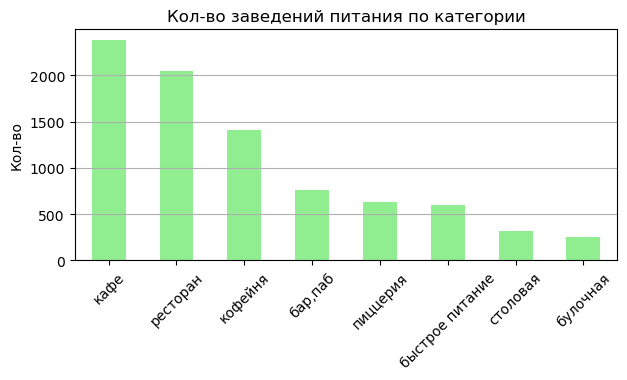

In [27]:
# создадим контейнер графика и зададим его размер
plt.figure(figsize=(7,3))

# строим столбчатую диаграмму
df['category'].value_counts().plot(
                    kind='bar',
                    legend=False,
                    title='Кол-во заведений питания по категории',
                    xlabel='',
                    ylabel='Кол-во',
                    color='lightgreen',
                    rot=45,
                    )
plt.grid(axis='y')
plt.show()

Видим, что самый популярный формат заведения общественного питания - кафе (более 2000 заведений из 8403, т.е. четверть)

[к содержанию](#label_0)

---
<a id="label_3_2"></a>
### Задача 2

Какие административные районы Москвы присутствуют в данных? Исследуем распределение количества заведений по административным районам Москвы, а также отдельно распределение заведений каждой категории в Центральном административном округе Москвы. 

In [28]:
# сгруппируем данные по административным районам и посчитаем кол-во заведений
admin_count = df.groupby('district').agg({'id':'count'})
admin_count.sort_values('id', ascending=False)

,id
district,
Центральный административный округ,2242
Северный административный округ,898
Южный административный округ,892
Северо-Восточный административный округ,890
Западный административный округ,850
Восточный административный округ,798
Юго-Восточный административный округ,714
Юго-Западный административный округ,709
Северо-Западный административный округ,409


In [29]:
# посмотим, какая доля заведений в каждом районе
df['district'].value_counts(normalize=True)

district
Центральный административный округ         0.266841
Северный административный округ            0.106879
Южный административный округ               0.106165
Северо-Восточный административный округ    0.105927
Западный административный округ            0.101166
Восточный административный округ           0.094977
Юго-Восточный административный округ       0.084980
Юго-Западный административный округ        0.084385
Северо-Западный административный округ     0.048679
Name: proportion, dtype: float64

<Figure size 700x300 with 0 Axes>

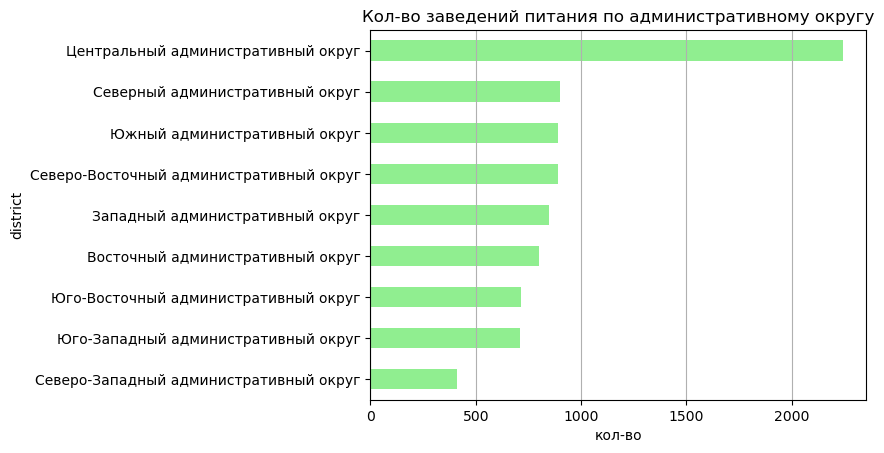

In [30]:
# создадим контейнер графика и зададим его размер
plt.figure(figsize=(7,3))

# строим линейчатую диаграмму
admin_count.sort_values('id').plot(
                    kind='barh',
                    legend=False,
                    title='Кол-во заведений питания по административному округу',
                    xlabel='',
                    color='lightgreen'
                    )
plt.xlabel('кол-во')
plt.grid(axis='x')
plt.show()

Четверть всех заведений находится в Центральном административном округе (ЦАО), в нем более чем в 2 раза больше заведений, чем во всех остальных районах по отдельности.

Рассмотрим этот округ внимательнее - посчитаем кол-во заведений в ЦАО по категориям заведений.

In [31]:
# группируем по категориям
cao_category = df[df['district'] == 'Центральный административный округ'].groupby('category')['id'].count().reset_index()
cao_category = cao_category.rename(columns={'id':'count'}) # заменяем название столбца
cnt = cao_category['count'].sum()
cao_category['share'] = round(cao_category['count'] / cnt * 100,3) # считаем долю
cao_category.sort_values('count', ascending=False)

,category,count,share
6,ресторан,670,29.884
3,кафе,464,20.696
4,кофейня,428,19.090
0,"бар,паб",364,16.236
5,пиццерия,113,5.040
2,быстрое питание,87,3.880
7,столовая,66,2.944
1,булочная,50,2.230


<Figure size 700x300 with 0 Axes>

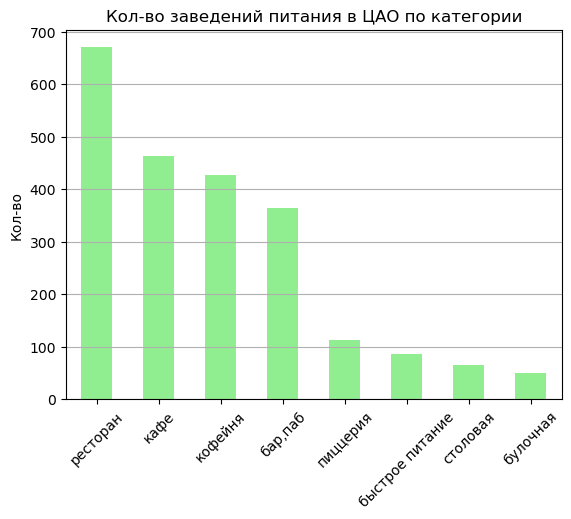

In [32]:
# создадим контейнер графика и зададим его размер
plt.figure(figsize=(7,3))

# строим столбчатую диаграмму
cao_category.sort_values('count', ascending=False).plot(
                    x='category',
                    y='count',
                    kind='bar',
                    legend=False,
                    title='Кол-во заведений питания в ЦАО по категории',
                    xlabel='',
                    ylabel='Кол-во',
                    color='lightgreen',
                    rot=45
                    )
plt.grid(axis='y')
plt.show()

<Figure size 700x300 with 0 Axes>

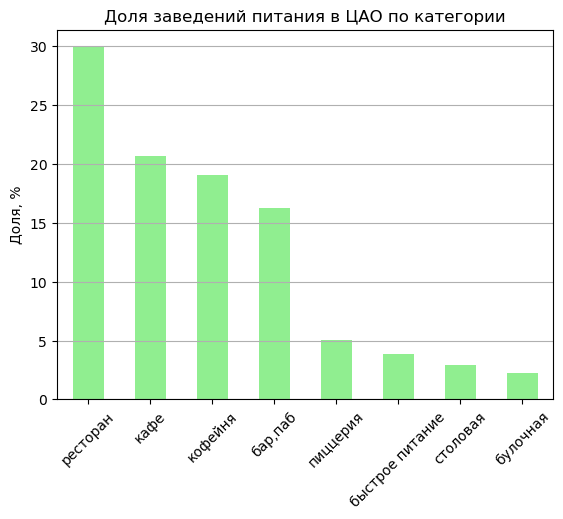

In [33]:
# создадим контейнер графика и зададим его размер
plt.figure(figsize=(7,3))

# строим столбчатую диаграмму
cao_category.sort_values('share', ascending=False).plot(
                    x='category',
                    y='share',
                    kind='bar',
                    legend=False,
                    title='Доля заведений питания в ЦАО по категории',
                    xlabel='',
                    ylabel='Доля, %',
                    color='lightgreen',
                    rot=45
                    )
plt.grid(axis='y')
plt.show()

В ЦАО выделяется топ-4 категории заведений:

- рестораны - 670  `(29,88%)`
- кафе - 464  `(20,7%)`
- кофейня - 428  `(19,09%)`
- бар,паб - 364  `(16,24%)`

[к содержанию](#label_0)

---
<a id="label_3_3"></a>
### Задача 3

Изучим соотношение сетевых и несетевых заведений в целом по всем данным и в разрезе категорий заведения. Каких заведений больше — сетевых или несетевых? Какие категории заведений чаще являются сетевыми? 

Посчитаем, сколько в предоставленных данны сетевых и не сетевых заведений

In [34]:
chain_count = df['chain'].value_counts(normalize=True)
chain_count

chain
0    0.618543
1    0.381457
Name: proportion, dtype: float64

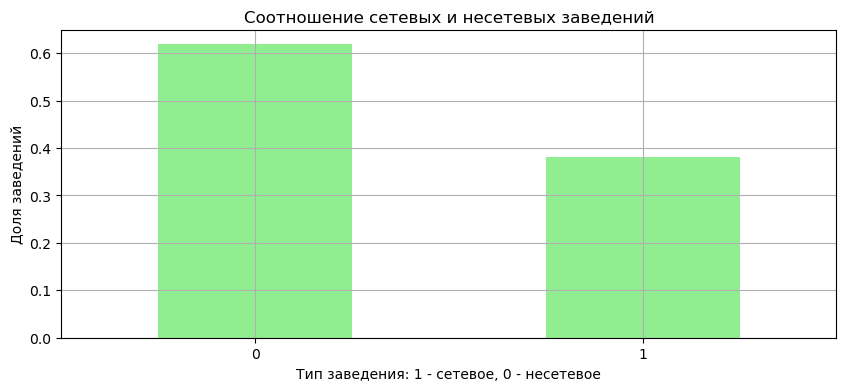

In [35]:
plt.figure(figsize=(10, 4)) 

chain_count.plot(kind='bar',
                color='lightgreen',
                rot=0)

plt.title('Соотношение сетевых и несетевых заведений') 
plt.xlabel('Тип заведения: 1 - сетевое, 0 - несетевое') 
plt.ylabel('Доля заведений') 
plt.grid()
plt.show()

Несетевых заведений почти в 2 раза больше, чем сетевых.

Посмотрим как распределены сетевые и несетевые заведения по категориям.

In [36]:
df.groupby('category')['chain'].mean().sort_values(ascending=False)

category
булочная           0.613281
пиццерия           0.521327
кофейня            0.509554
быстрое питание    0.384743
ресторан           0.357668
кафе               0.327862
столовая           0.279365
бар,паб            0.220915
Name: chain, dtype: float64

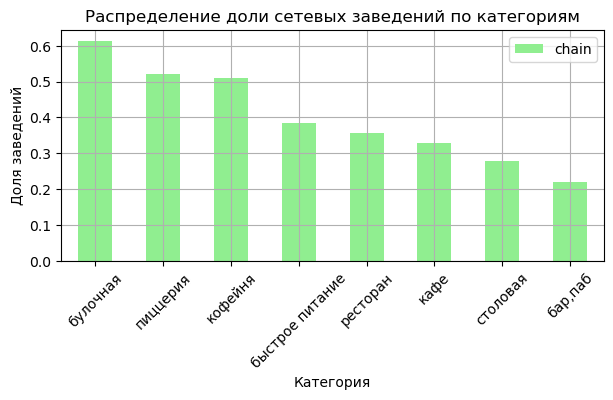

In [37]:
# Построим график столбчатой диаграммы
grouped = df.groupby('category')['chain'].mean().sort_values(ascending=False)
grouped.plot(kind='bar',
                title='Распределение доли сетевых заведений по категориям',
                legend=True,
                ylabel='Доля заведений',
                xlabel='Категория',
                rot=45,
                figsize=(7, 3),
                color= 'lightgreen')

plt.grid()

# Выводим график
plt.show()

Видим, что чаще всего сетевыми являются заведения типа Булочная, Пиццерия и Кофейня (более 50% заведений в каждой категории).

[к содержанию](#label_0)

---
<a id="label_3_4"></a>
### Задача 4

Исследуем количество посадочных мест в заведениях. Встречаются ли в данных аномальные значения или выбросы? Посчитаем для каждой категории заведений наиболее типичное для него количество посадочных мест.


In [38]:
# исследуем столбец seats
df[df['seats']>=0]['seats'].describe(percentiles=[0.25, 0.5, 0.75, 0.95, 0.99])

count    4792.000000
mean      108.361435
std       122.841225
min         0.000000
25%        40.000000
50%        75.000000
75%       140.000000
95%       307.000000
99%       625.000000
max      1288.000000
Name: seats, dtype: float64

Видим, что есть анамальные значения начиная с 99% процентиля - 625 мест, и заканчивая максимумом в 1288 мест.

Исследуем распределение значений посадочных мест.

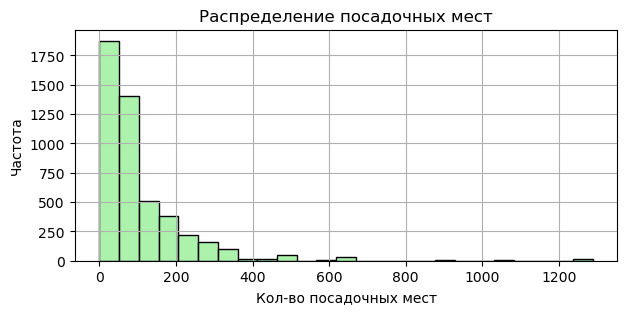

In [39]:
# построим гистограмму распределения посадочных мест
plt.figure(figsize=(7, 3))

sns.histplot(df, x='seats', bins=25, color='lightgreen')

plt.title('Распределение посадочных мест') 
plt.xlabel('Кол-во посадочных мест') 
plt.ylabel('Частота') 
plt.grid()
plt.show()

Видим, что больше всего заведений с количеством мест до 100 (частоты выше 1300).

Построим диаграмму размаха

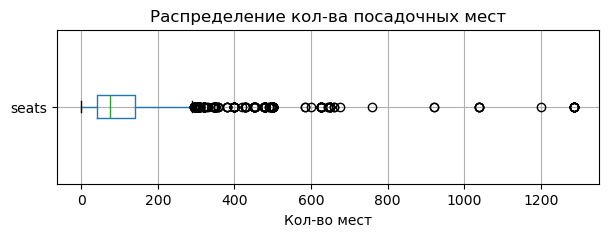

In [40]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(7, 2))

# Строим диаграмму размаха значений в столбце seats
df.boxplot(column='seats', vert=False)

# Добавляем заголовок и метки оси
plt.title('Распределение кол-ва посадочных мест')
plt.xlabel('Кол-во мест')

# Выводим график
plt.show()

Видим, что есть много выбросов от 300 и выше мест. Возможно есть такие заведения (банкетные залы, фут-корты в торговых центрах).

Посмотрим типичное кол-во мест для категорий заведений общественного питания.

<Figure size 1000x400 with 0 Axes>

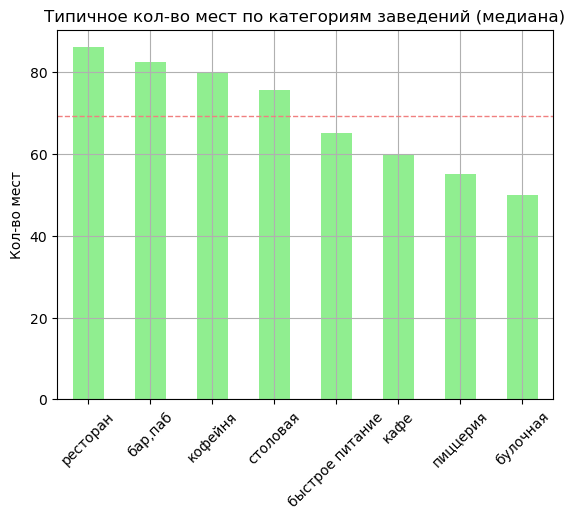

In [41]:
# отфильтруем данные от 0 до 99% процентиля
# df_clean_filter = df_clean[(df_clean['seats'] >= 0) & (df_clean['seats'] < df_clean['seats'].quantile(0.99))]

plt.figure(figsize=(10, 4))

# посчитаем медиану кол-ва мест по категориям
df_median = df.groupby('category')['seats'].median().reset_index()

# построим столбчатую диаграмму
df_median.sort_values('seats', ascending=False).plot(x='category',
                    kind='bar',
                    legend=False,
                    title='Типичное кол-во мест по категориям заведений (медиана)',
                    xlabel='',
                    ylabel='Кол-во мест',
                    color='lightgreen',
                    rot=45                  
                )

# посчитаем среднее значение медиан
median_mean = df.groupby('category')['seats'].median().mean()

# добавим линию средней медианы на график
plt.axhline(median_mean, 
            color='lightcoral', 
            linestyle='--', 
            linewidth=1
           )

plt.grid()
plt.show()

C:\Users\DrGremlin\AppData\Local\Temp\ipykernel_13292\3198941175.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='category',


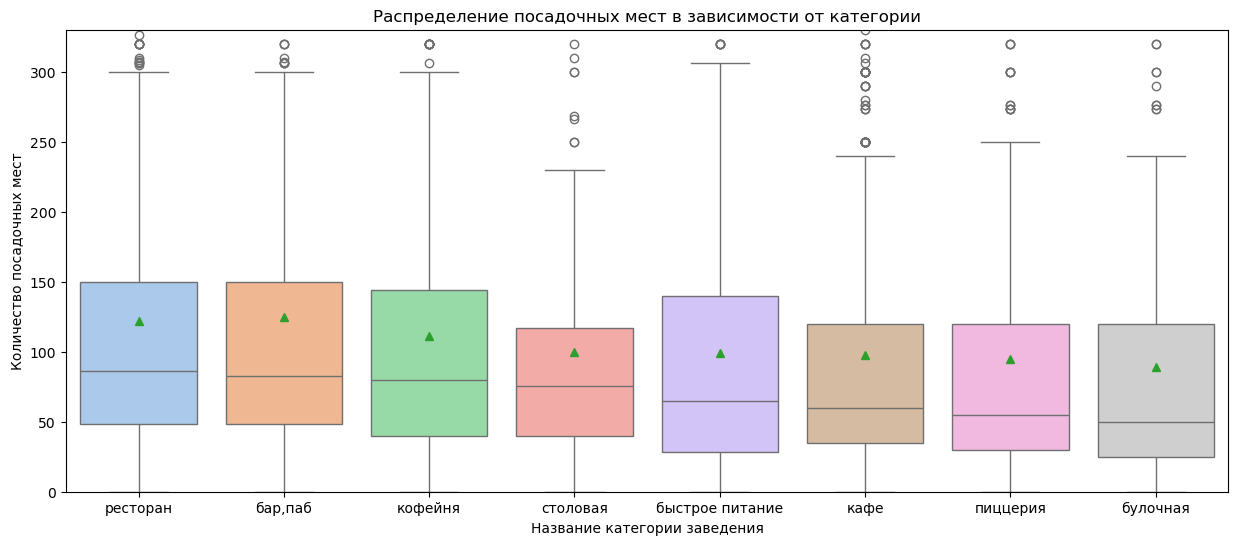

In [42]:
tmp = df.copy()  # Создаем копию датасета, что бы не работать с исходным

# Создаем список категорий сортированный по медианам
order=tmp.groupby('category')['seats'].median().sort_values(ascending=False).index 

# Построение диаграммы размаха с использованием seaborn
plt.figure(figsize=(15, 6))
sns.boxplot(x='category', 
            y='seats', 
            data=tmp, 
            showmeans=True,  # Зеленые треугольники показывают среднее значение
            order=order,
            palette='pastel').set(title = 'Распределение посадочных мест в зависимости от категории', 
                             xlabel = 'Название категории заведения', 
                             ylabel = 'Количество посадочных мест',
                             ylim=(0, 330))   # Ограничиваем вывод для того, чтобы боксплоты были крупными, 
                                              # если убрать, то будут видны все выбросы
# Отображение диаграммы
plt.show()

Среднее типичное (медианное) кол-во мест для заведений Москвы - 69.

Разброс типичного (медианного) кол-ва мест от 50 до 86.

В Ресторанах, Бар,паб, кофейнях и столовых медианное кол-во мест выше среднего по всем категориям.

[к содержанию](#label_0)

---
<a id="label_3_5"></a>
### Задача 5

Исследуем рейтинг заведений. Визуализируем распределение средних рейтингов по категориям заведений. Посмотрим, сильно ли различаются усреднённые рейтинги для разных типов общепита?

Посчитаем средний рейтинг по категориям заведений.

Рейтинг в данных - это средний рейтинг заведения (клиенты выставляют целочисленные оценки). Следовательно, мы будем оценивать в статистике среднее среднего и медиану среднего.

In [43]:
# посмотрим статистику рейтинга по категориям заведений
df.groupby('category')['rating'].describe().sort_values('count', ascending=False)

,count,mean,std,min,25%,50%,75%,max
category,,,,,,,,
кафе,2376.0,4.124284,0.566003,1.0,4.0,4.2,4.4,5.0
ресторан,2041.0,4.290348,0.413236,1.0,4.2,4.3,4.5,5.0
кофейня,1413.0,4.277282,0.372251,1.4,4.1,4.3,4.4,5.0
"бар,паб",765.0,4.387712,0.380143,1.1,4.3,4.4,4.6,5.0
пиццерия,633.0,4.301264,0.336162,1.0,4.2,4.3,4.4,5.0
быстрое питание,603.0,4.050249,0.560949,1.1,3.9,4.2,4.3,5.0
столовая,315.0,4.211429,0.454205,1.0,4.1,4.3,4.4,5.0
булочная,256.0,4.268360,0.386303,1.3,4.2,4.3,4.4,5.0


Видим, что срение ниже медианы, т.е. распределения имеют левыый "хвост". Первый квантиль почти весь выше 4,0 (кроме категории быстрого питания - 3,9), а медиана не превышает 4,4 - следовательно, посетители чаще ставят 4 и 5 (но 4 больше). По максимому видим, что во всех категориях есть заведения с оценкой 5,0 (т.е. все клиенты поставили 5).

In [44]:
rating_mean = df.groupby('category')['rating'].mean().reset_index().round(2)
rating_mean

,category,rating
0,"бар,паб",4.39
1,булочная,4.27
2,быстрое питание,4.05
3,кафе,4.12
4,кофейня,4.28
5,пиццерия,4.30
6,ресторан,4.29
7,столовая,4.21


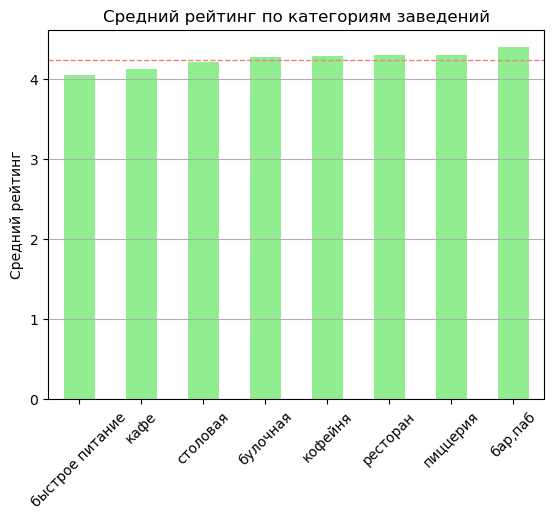

In [45]:
# построим столбчатую диаграмму
rating_mean.sort_values('rating').plot(x='category',
                    kind='bar',
                    legend=False,
                    title='Средний рейтинг по категориям заведений',
                    xlabel='',
                    ylabel='Средний рейтинг',
                    color='lightgreen',
                    rot=45                  
                )

# добавим линию средней медианы на график
plt.axhline(rating_mean['rating'].mean(), 
            color='lightcoral', 
            linestyle='--', 
            linewidth=1
           )


plt.grid(axis='y')
plt.show()

Средний рейтинг у всех категорий выше 4,0, это говорит от том, что посетители чаще ставят 4 и 5:

- средний по всем категориям - 4,24. 
- самый высокий у категории "бар,паб" - 4,39.
- самый низкий у категории "быстрое питание" - 4,05

Посмотрим долю заведений с оценой `5` по категориям

In [46]:
cnt_5 = df[df['rating'] == 5].groupby('category')['rating'].count().reset_index()
cnt_sum = cnt_5['rating'].sum()
cnt_5['share'] = round(cnt_5['rating'] / cnt_sum * 100, 2)
cnt_5.sort_values('rating', ascending=False)

,category,rating,share
4,кофейня,37,35.24
3,кафе,30,28.57
6,ресторан,15,14.29
0,"бар,паб",7,6.67
5,пиццерия,7,6.67
2,быстрое питание,6,5.71
7,столовая,2,1.90
1,булочная,1,0.95


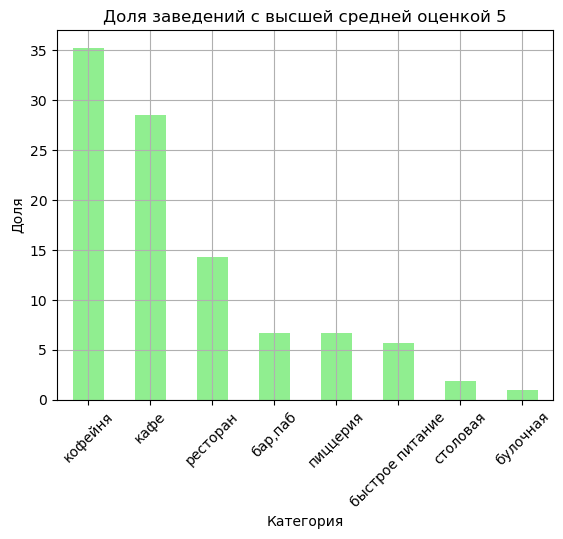

In [47]:
cnt_5.sort_values('rating', ascending=False).plot(kind='bar',
                                                 x='category',
                                                 y='share',
                                                 color='lightgreen',
                                                 rot=45,
                                                 legend=False)

plt.title('Доля заведений с высшей средней оценкой 5') 
plt.xlabel('Категория') 
plt.ylabel('Доля') 
plt.grid()
plt.show()

Видим, что больше всего заведений с высшей средней оценкой 5 у категорий Кофейня, Кафе и Ресторан (суммарно 78% от всех заведений с оценокой 5)

[к содержанию](#label_0)

---
<a id="label_3_6"></a>
### Задача 6

Изучим, с какими данными показывают самую сильную корреляцию рейтинги заведений. Построим и визуализируем матрицу корреляции рейтинга заведения с разными данными: его категория, положение (административный район Москвы), статус сетевого заведения, количество мест, ценовая категория и признак, является ли заведения круглосуточным. Выберем самую сильную связь и проверим её.

In [48]:
# Вычисляем корреляционную матрицу с использованием phi_k
correlation_matrix = df[['rating', 'category', 'district', 'chain', 'seats', 'price', 'is_24_7']].phik_matrix()

# Выводим результат
print('\n Корреляционная матрица с коэффициентом phi_k для переменной rating')
correlation_matrix.loc[correlation_matrix.index != 'rating'][['rating']].sort_values(by='rating', ascending=False)

interval columns not set, guessing: ['rating', 'chain', 'seats']

 Корреляционная матрица с коэффициентом phi_k для переменной rating


,rating
price,0.262056
category,0.198763
district,0.189453
is_24_7,0.161010
chain,0.119212
seats,0.000000


Визуализируем результат корреляции с помощью тепловой карты и библиотеки seaborn:

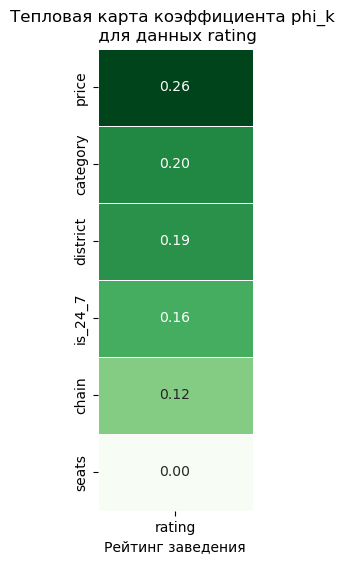

In [49]:
# Строим тепловую карту
plt.figure(figsize=(2, 6))

# Сохраняем матрицу корреляции признака rating с другими признаками заведений
data_heatmap = correlation_matrix.loc[correlation_matrix.index != 'rating'][['rating']].sort_values(by='rating', ascending=False)
sns.heatmap(data_heatmap,
            annot=True, 
            fmt='.2f', 
            cmap='Greens', 
            linewidths=0.5,
            cbar=False
            )

# Добавляем заголовок и подпись по оси Х
plt.title('Тепловая карта коэффициента phi_k \n для данных rating')
plt.xlabel('Рейтинг заведения')

# Выводим график
plt.show()

Сильных корреляций нет, самая сильная связь поля `rating` с ценовой категорией `price` - 0,26.

Исследуем эту связь.

In [50]:
# отфильтруем данные, уберем price = Nan
rating_price_df = df[df['price'].notna()]

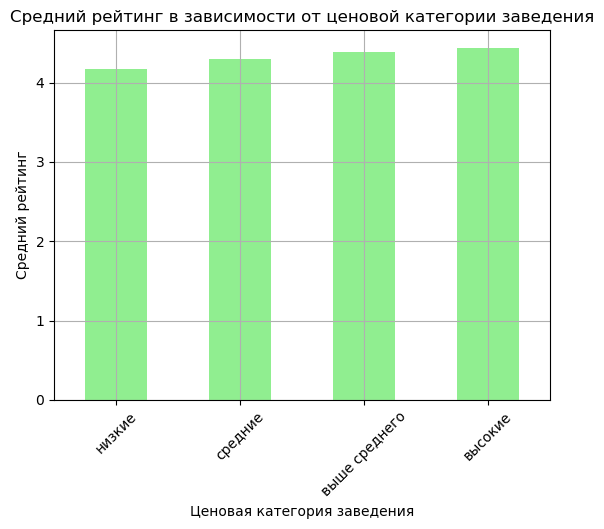

In [51]:
# группируем по категориям
rating_price_df.groupby('price')['rating'].mean().reset_index().sort_values('rating').plot(kind='bar',
                                                                                         x='price',
                                                                                         y='rating',
                                                                                         color='lightgreen',
                                                                                         rot=45,
                                                                                         legend=False)

plt.title('Средний рейтинг в зависимости от ценовой категории заведения') 
plt.xlabel('Ценовая категория заведения') 
plt.ylabel('Средний рейтинг') 
plt.grid()
plt.show()


Видим, что более высокий рейтинг у заведений с ценовой категорией "выше среднего" и "высокие". Это может быть связано с более качетвенным сервисом в заведениях с высоким ценником.

[к содержанию](#label_0)

---
<a id="label_3_7"></a>
### Задача 7

Сгруппируем данные по названиям заведений и найдем топ-15 популярных сетей в Москве. Для них посчитаем значения среднего рейтинга. Под популярностью понимается количество заведений этой сети в регионе. Посмотрим, к какой категории заведений они относятся? 

In [52]:
# отфильтруем заведения - оставим только сети
df_chain = df[df['chain'] == 1]

# сгруппируем данные по названию заведения и категории
# и посчитаем кол-во заведений и их рейтинг и отстортируем по убыванию кол-ва
df_group = df_chain.groupby(['norm_name', 'category']).agg({'id':'count', 'rating':'mean'}).reset_index().sort_values('id', ascending=False)

# заменим название столбцов
df_group.columns = ['name', 'category','count', 'mean_rating']
# округлим рейтинг
df_group['mean_rating'] = df_group['mean_rating'].round(2)

# выведем топ-15
df_top_15 = df_group.head(15)
df_top_15

,name,category,count,mean_rating
1126,шоколадница,кофейня,119,4.18
496,домино'с пицца,пиццерия,76,4.17
489,додо пицца,пиццерия,74,4.29
205,one price coffee,кофейня,71,4.06
1142,яндекс лавка,ресторан,69,3.87
72,cofix,кофейня,65,4.08
241,prime,ресторан,49,4.11
617,кофепорт,кофейня,42,4.15
632,кулинарная лавка братьев караваевых,кафе,39,4.39
963,теремок,ресторан,36,4.11


Видим, что сюда попала Яндекс Лавка, хотя это доставочный сервис, у них нет своих ресторанов. Нужно исключить его из рейтинга.

Перепишем код выше.

In [53]:
# отфильтруем заведения - оставим только сети и исключаем Яндекс Лавку
df_chain = df[(df['chain'] == 1) & (df['norm_name'] != 'яндекс лавка')]

# сгруппируем данные по названию заведения и категории
# и посчитаем кол-во заведений и их рейтинг и отстортируем по убыванию кол-ва
df_group = df_chain.groupby(['norm_name', 'category']).agg({'id':'count', 'rating':'mean'}).reset_index().sort_values('id', ascending=False)

# заменим название столбцов
df_group.columns = ['name', 'category','count', 'mean_rating']
# округлим рейтинг
df_group['mean_rating'] = df_group['mean_rating'].round(2)

# выведем топ-15
df_top_15 = df_group.head(15)
df_top_15

,name,category,count,mean_rating
1126,шоколадница,кофейня,119,4.18
496,домино'с пицца,пиццерия,76,4.17
489,додо пицца,пиццерия,74,4.29
205,one price coffee,кофейня,71,4.06
72,cofix,кофейня,65,4.08
241,prime,ресторан,49,4.11
617,кофепорт,кофейня,42,4.15
632,кулинарная лавка братьев караваевых,кафе,39,4.39
963,теремок,ресторан,36,4.11
50,cofefest,кофейня,31,3.98


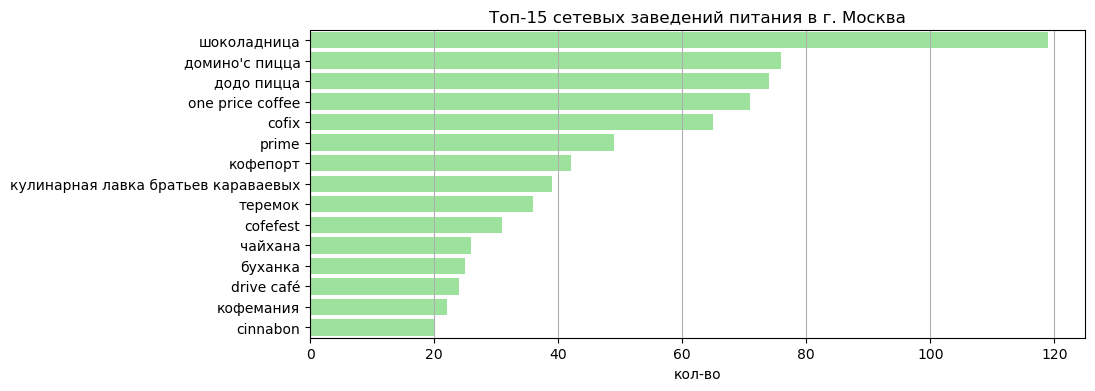

In [54]:
# создадим контейнер графика и зададим его размер
plt.figure(figsize=(10,4))

# строим линейчатую диаграмму
sns.barplot(x='count', y='name', data=df_top_15, color='lightgreen', orient='h')
                
plt.title('Топ-15 сетевых заведений питания в г. Москва')
plt.xlabel('кол-во')
plt.ylabel('')
plt.grid(axis='x')
plt.show()

Лидером является Шоколадница с 119 заведениями в Москве.

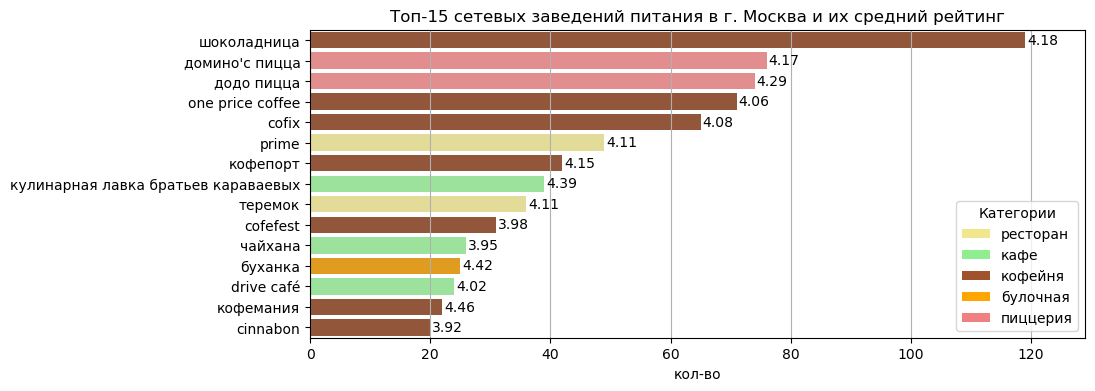

In [55]:
# Сопоставление категорий с цветами
category_colors = {
    'ресторан': 'khaki',
    'кафе': 'lightgreen',
    'кофейня': 'sienna',
    'булочная': 'orange',
    'пиццерия': 'lightcoral'
}

# Список цветов для столбцов
colors = df_top_15['category'].map(category_colors).tolist()

# создадим контейнер графика и зададим его размер
plt.figure(figsize=(10,4))

# строим линейчатую диаграмму
ax = sns.barplot(x='count', y='name', hue='name', data=df_top_15, palette=colors, orient='h', legend=False)
                
# создаем легенду
legend_handles = [Patch(facecolor=color, label=cat) for cat, color in category_colors.items()]
plt.legend(handles=legend_handles, title='Категории')

# Добавляем текст с рейтингом справа от каждого столбца
for i, (count, rating) in enumerate(zip(df_top_15['count'], df_top_15['mean_rating'])):
    ax.text(count + 0.3, i, str(round(rating, 2)), va='center', ha='left', fontsize=10)

# Расширяем пределы оси X, чтобы текст рейтинга не выходил за границы
max_count = df_top_15['count'].max()
plt.xlim(0, max_count + 10)  # 10 — запас для текста, можно регулировать

plt.title('Топ-15 сетевых заведений питания в г. Москва и их средний рейтинг')
plt.xlabel('кол-во')
plt.ylabel('')
plt.grid(axis='x')
plt.show()

Первые три места из топ-15 занимают кофейня и пиццерии. 

В топ-15 вошли:

- кофейня - 7
- кафе - 3
- ресторан - 2
- пиццерия - 2
- булочная - 1

[к содержанию](#label_0)

---
<a id="label_3_8"></a>
### Задача 8

Изучим вариацию среднего чека заведения (столбец `middle_avg_bill`) в зависимости от района Москвы. Проанализируем цены в Центральном административном округе и других. Как удалённость от центра влияет на цены в заведениях? 


In [56]:
# исследуем значения в толбце middle_avg_bill
df['middle_avg_bill'].describe(percentiles=[0.01, 0.25, 0.5, 0.75, 0.95, 0.99])

count     3149.000000
mean       958.053650
std       1009.734436
min          0.000000
1%         140.000000
25%        375.000000
50%        750.000000
75%       1250.000000
95%       2250.000000
99%       3750.000000
max      35000.000000
Name: middle_avg_bill, dtype: float64

Видим выбросы в виде 0 в минимуме и 35000 в максимуме

<font color='Red'><b>!</b></font> Обращаю внимание, что последующее исследование делается всего для 3149 заведений - для этого кол-ва заведений есть данные в столбце среднего чека `middle_avg_bill`.

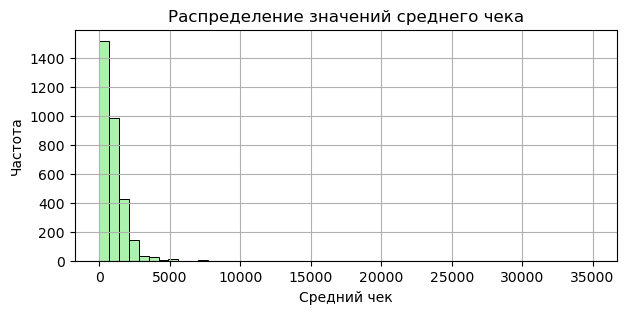

In [57]:
# построим гистограмму распределения среднего чека
plt.figure(figsize=(7, 3))

sns.histplot(df, x='middle_avg_bill', bins=50, color='lightgreen')

plt.title('Распределение значений среднего чека') 
plt.xlabel('Средний чек') 
plt.ylabel('Частота') 
plt.grid()
plt.show()

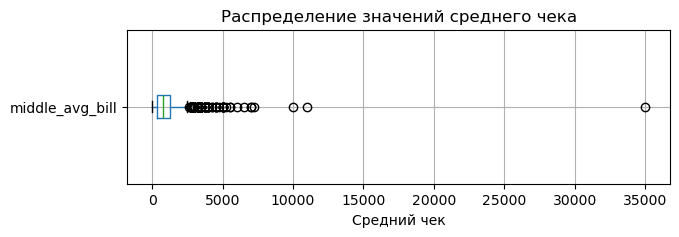

In [58]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(7, 2))

# Строим диаграмму размаха значений в столбце middle_avg_bill
df.boxplot(column='middle_avg_bill', vert=False)

# Добавляем заголовок и метки оси
plt.title('Распределение значений среднего чека')
plt.xlabel('Средний чек')

# Выводим график
plt.show()

Больше всего значений среднего чека в диапазоне от 0 до 800руб.

Видим большое скопление выбросов от 2500 до 7500 руб. Есть несколько значений выше 10000 руб. Максимальный выброс - 35000руб.

In [59]:
# посчитаем среднее и медиану среднего чека по округам
bill_group = df.groupby('district').agg({'middle_avg_bill':['median', 'mean']}).reset_index()
bill_group.columns = ['district', 'median', 'mean']
bill_group

,district,median,mean
0,Восточный административный округ,575.0,820.626953
1,Западный административный округ,1000.0,1053.225464
2,Северный административный округ,650.0,927.959656
3,Северо-Восточный административный округ,500.0,716.611267
4,Северо-Западный административный округ,700.0,822.222900
5,Центральный административный округ,1000.0,1191.057495
6,Юго-Восточный административный округ,450.0,654.097961
7,Юго-Западный административный округ,600.0,792.561707
8,Южный административный округ,500.0,834.398071


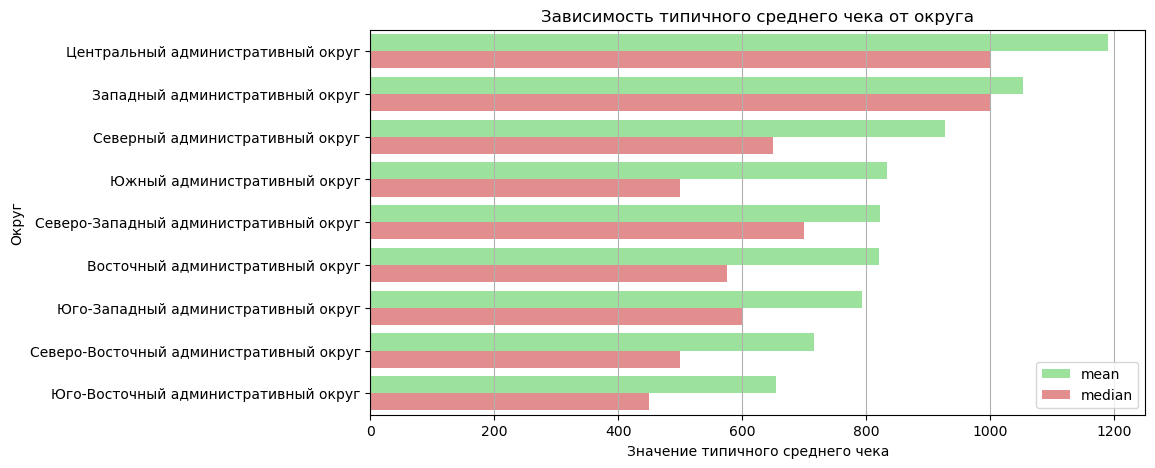

In [60]:
# построим линейчатую диаграмму
plt.figure(figsize=(10,5))

# Преобразуем данные в "длинный" формат
df_long = bill_group.melt(id_vars='district', value_vars=['mean', 'median'],
                  var_name='stat', value_name='value')

# сделаем список для сортировки графика по убыванию
order = (
    df_long[df_long['stat'] == 'mean']
    .sort_values('value', ascending=False)['district']
    .tolist()
)

sns.barplot(x='value', 
            y='district', 
            data=df_long, hue='stat', 
            palette=['lightgreen', 'lightcoral'], 
            orient='h', 
            order=order)
                
plt.title('Зависимость типичного среднего чека от округа')
plt.xlabel('Значение типичного среднего чека')
plt.ylabel('Округ')
plt.legend(title='')
plt.grid(axis='x')
plt.show()

Видим, что средний чек выше всего в ЦАО - 1191руб. и меньше всего в ЮВАО - 654руб. Возможно, это связано с арендной платой помещений, в ЦАО она выше, чем в ЮВАО. Еще это может быть связано с высоким спросом - в центре Москвы больше плотность офисов и туристических мест, и, соответственно, больше людей, нуждающихся в таких заведениях.

Медианное значение среднего чека самая высокая (1000 руб.) в двух районах - ЦАО и ЗАО.

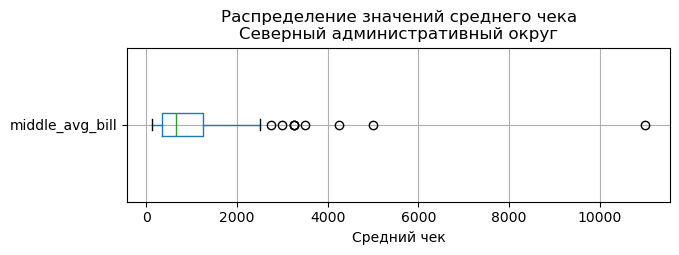

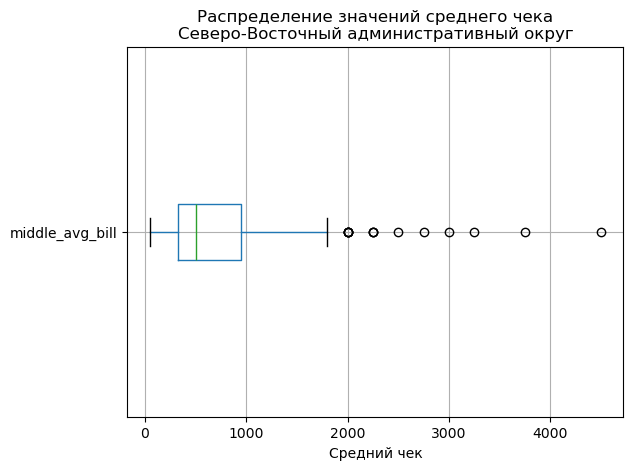

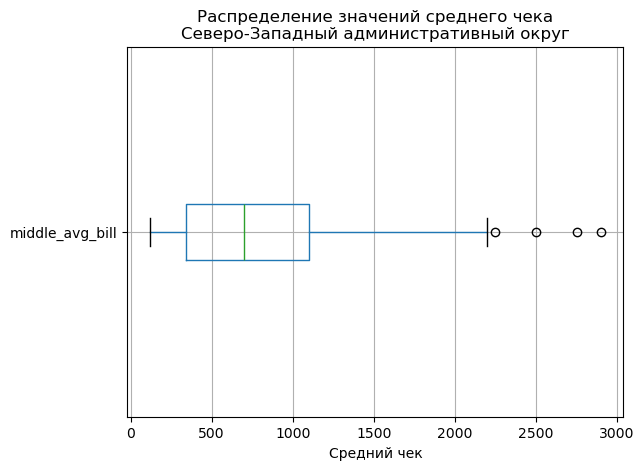

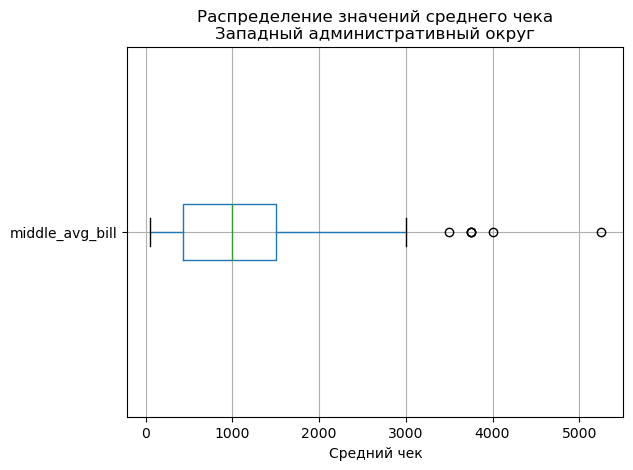

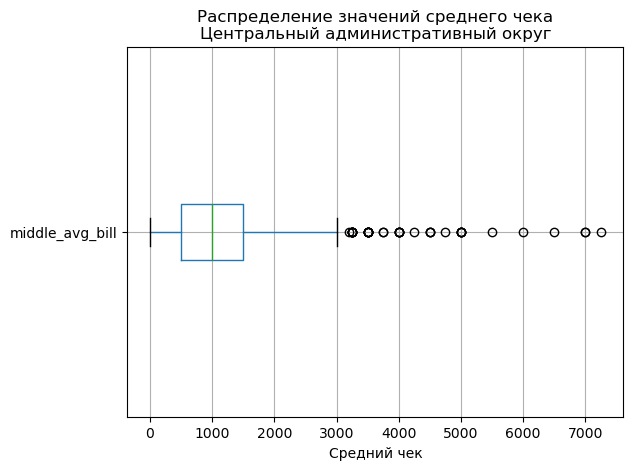

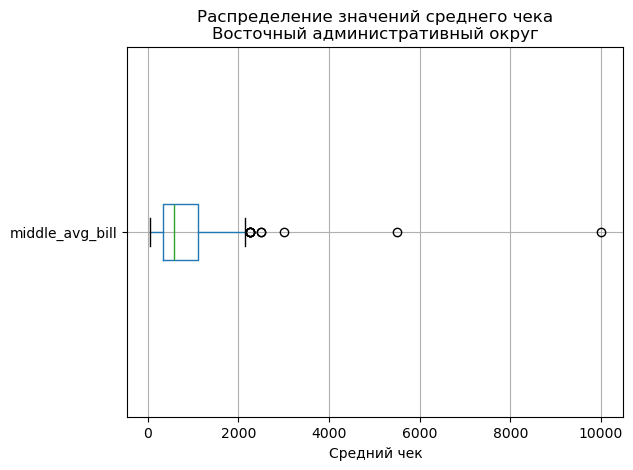

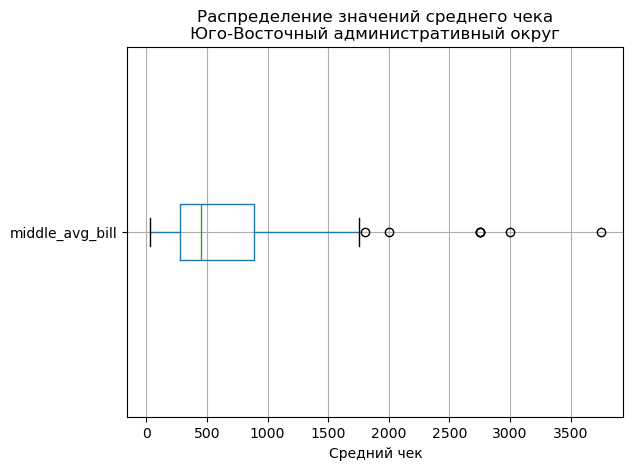

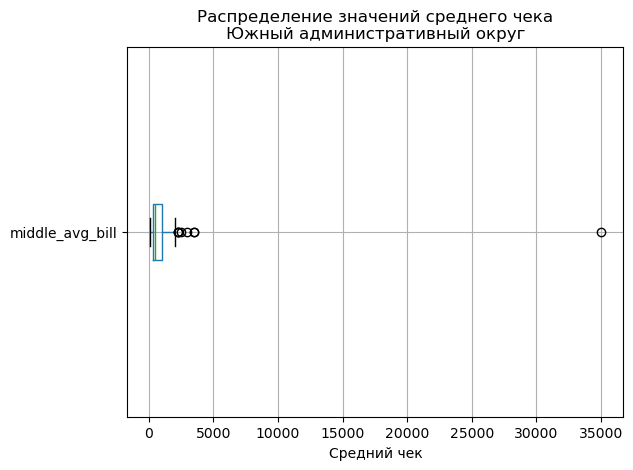

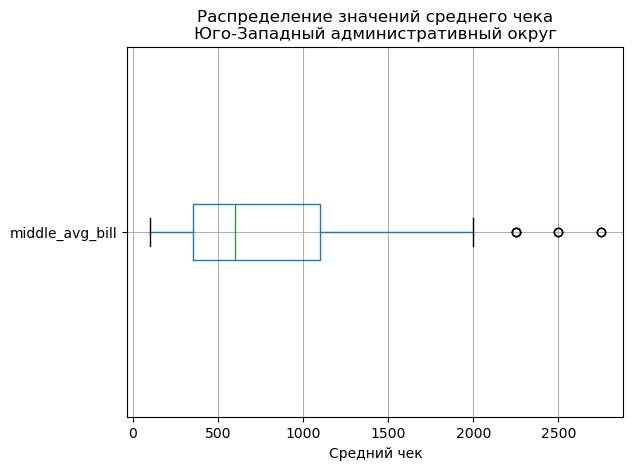

In [61]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(7, 2))

# Строим диаграмму размаха значений в столбце middle_avg_bill для каждого района
for dist in df['district'].unique():
    df[df['district'] == dist].boxplot(column='middle_avg_bill', vert=False)

    # Добавляем заголовок и метки оси
    plt.title(f'Распределение значений среднего чека\n{dist}')
    plt.xlabel('Средний чек')

    # Выводим график
    plt.show()

Видим, что наименьшее кол-во выбросов среднего чека в ЮЗАО - всего 3 заведения со средним чеком выше 2000руб. Больше всего выбросов в ЦАО, что говорит о большем разнообразии заведений от дешовых до респектабельных находится в этом районе.

Рассмотрим, как распределены цены в ЦАО

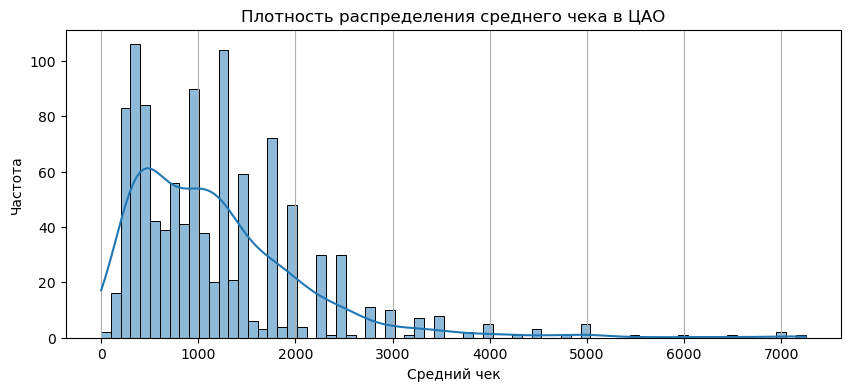

In [62]:
# Создаём фигуру графика
plt.figure(figsize=(10, 4))


sns.histplot(df[df['district'] == 'Центральный административный округ'], 
             x='middle_avg_bill', 
             bins=72, # кол-во корзин выбрано, чтобы ширина столбца была примерно 100руб.
             kde=True
    )

# Настраиваем внешний вид графика и выводим его на экран
plt.title(f'Плотность распределения среднего чека в ЦАО')
plt.xlabel('Средний чек')
plt.ylabel('Частота')

plt.grid(axis='x')
plt.show()

Видим три ярко выраженных максимума:
- 300-400 руб.
- 1200-1300 руб.
- 1700-1800 руб.

**Промежуточный вывод**

Исследование 3149 заведений по среднему чеку показало:
- наибольший средний чек (1191руб.) в ЦАО
- в других районах средний чек ниже, что отвечает на вопрос поставленной задачи
- в ЦАО наиболее часто встречающиеся интервалы среднего чека:
    - 300-400 руб.
    - 1200-1300 руб.
    - 1700-1800 руб.

Более высокий средний чек в ЦАО возможно из-за того, что в этом районе больше концентрация людей (больше офисов, больше туристических мест), что приводит к повышенному спросу на еду и развлечения. Также возможно что на ценник влияет более высокая аренда помещений, чем в других районах Москвы.

[к содержанию](#label_0)

---
<a id="label_3_9"></a>
### Промежуточный вывод

В данных представлены следующие категории заведений общественного питания: 
- `кафе` 
- `ресторан`
- `кофейня` 
- `пиццерия` 
- `бар,паб`
- `быстрое питание` 
- `булочная` 
- `столовая`

3-ка лидеров по кол-ву заведений:

- кафе - 2377 заведений (28% от всего кол-ва заведений) 
- ресторан - 2041 заведений (24% от всего кол-ва заведений)
- кофейня - 1413 заведений (17% от всего кол-ва заведений)

27% всех заведений находится в Центральном административном округе (ЦАО), в нем более чем в 2 раза больше заведений, чем во всех остальных районах по отдельности. В 3-ке лидиров этого района все те же типы заведений - **Ресторан (30%), Кафе (21%), Кофейня (19%)**.

В предоставленных данных 38% заведений - сетевые.
Больше всего в сетевых заведениях предствлены следующие категории:
- булочная -     61,33% от всех заведений в данной категории являются сетевыми
- пиццерия -     52,13% от всех заведений в данной категории являются сетевыми
- кофейня  -     50,96% от всех заведений в данной категории являются сетевыми

Исследовано 4792 заведений, для которых есть информация о кол-ве посадочных мест. Среднее типичное кол-во мест в заведениях - 69. Разброс типичного кол-ва мест от 50 (булочная) до 86 (ресторан).

Средний рейтинг у всех категорий выше 4,0, это говорит от том, что посетители чаще ставят 4 и 5:
- средний по всем категориям - 4,24.
- самый высокий у категории "бар,паб" - 4,39.
- самый низкий у категории "быстрое питание" - 4,05
Больше всего заведений с высшей средней оценкой 5 у категорий Кофейня, Кафе и Ресторан (суммарно 78% от всех заведений с оценокой 5).

Сильных корреляций рейтинга с категорией, положением (административный район Москвы), статусом сетевого заведения, количеством мест, ценовой категорией и признаком, является ли заведения круглосуточным - нет. Самая сильная связь поля rating с ценовой категорией price - 0,26. Анализ этой связи показал, что больший рейтинг ставят в заведениях с более высокими ценами за средний чек. Это может быть связано с более качетвенными продуктами и сервисом в заведениях с высоким ценником.

Анализ топ-15 заведений по кол-ву в Москве показал:
- Первые три места из топ-15 занимают кофейня (Шоколадница) и пиццерии (Домино'c пицца и Додо пицца). 
- В топ-15 вошли:
    - кофейня - 7
    - кафе - 3
    - ресторан - 2
    - пиццерия - 2
    - булочная - 1
    
Анализ среднего чека показал, что в ЦАО средний чек выше, чем во всех остальных районах Москвы. 

В ЦАО наиболее часто встречающиеся интервалы среднего чека:
- 300-400 руб.
- 1200-1300 руб.
- 1700-1800 руб.

Более высокий средний чек в ЦАО возможно из-за того, что в этом районе больше концентрация людей (больше офисов, больше туристических мест), что приводит к повышенному спросу на еду и развлечения. Также возможно что на ценник влияет более высокая аренда помещений, чем в других районах Москвы.

[к содержанию](#label_0)

<a id="label_4"></a>
## 4. Итоговый вывод и рекомендации

Целю исследования было помочь инвесторам определиться с местом для открытия своего заведения общественного питания, и помочь выбрать его формат.

Были поставлены следующие задачи:

1. Определить, какие категории заведений представлены в данных, исследовать кол-во объектов по каждой категории.
2. Исследовать распределение количества заведений по административным районам Москвы, а также отдельно распределение заведений каждой категории в ЦАО Москвы.
3. Изучить соотношение сетевых и несетевых заведений в целом по всем данным и в разрезе категорий заведения.
4. Изучить количество посадочных мест в заведениях.
5. Исследовать рейтинг заведений.
6. Изучить, с какими данными показывают самую сильную корреляцию рейтинги заведений.
7. Найти топ-15 популярных сетей в Москве.
8. Изучить вариацию среднего чека заведения (столбец middle_avg_bill) в зависимости от района Москвы.

**Что было сделано**

1. **Подготовка и предобработка данных**
- загружены файлы `rest_info.csv` (8406 строк и 9 столбцов) и `rest_price.csv` (4058 строк, 5 столбцов)
- создана объедененная таблица `df` (8406 строк и 13 столбцов) из полученных таблиц.
- проверены типы данных и числовые типы данных были оптимизированы
- пропуски оставлены как есть
- добавлены столбецы с norm_name и norm_address с нормализованными названиями и адресами
- добавлен столбец is_24_7, отображающий, работает ли заведение ежедневно и круглосуточно (True/False)
- удалено 4 строки (0,05%) с дубликатами по паре название-адрес

Итог: подготовлена таблица `df` с 8402 строками и 16 столбцами для дальнейшего анализа.

2. **Исследовательский анализ**

Были получены ответы на поставленные вопросы:
1. Самые популярные категории заведений по их кол-ву: Кафе (28% из всех заведений), Ресторан (24%) и Кофейня (17%).
2. 27% всех заведений находится в Центральном административном округе (ЦАО). В 3-ке лидиров этого района все те же типы заведений - Ресторан (30% от всех заведений ЦАО), Кафе (21%), Кофейня (19%).
3. В предоставленных данных 38% заведений - сетевые.
    Больше всего в сетевых заведениях предствлены следующие категории:
    - булочная -     61,33% от всех заведений в данной категории являются сетевыми
    - пиццерия -     52,13% от всех заведений в данной категории являются сетевыми
    - кофейня  -     50,96% от всех заведений в данной категории являются сетевыми
4. Исследовано 4792 заведений, для которых есть информация о кол-ве посадочных мест. Среднее типичное кол-во мест в заведениях - 69. Разброс типичного кол-ва мест от 50 (булочная) до 86 (ресторан).
5. Средний рейтинг у всех категорий выше 4,0, это говорит от том, что посетители чаще ставят 4 и 5. Самый высокий у категории "бар,паб" - 4,39. Больше всего заведений с высшей средней оценкой 5 у категорий Кофейня, Кафе и Ресторан (суммарно 78% от всех заведений с оценокой 5).
6. Самая высокая связь рейтинга обнаружена с ценовой категорией (столбец `price`). Исследование этой связи показало, что больший рейтинг ставят в заведениях с более высокими ценами за средний чек. Это может быть связано с более качетвенными продуктами и сервисом в заведениях с высоким ценником.
7. Анализ топ-15 заведений по кол-ву в Москве показал:
- Первые три места из топ-15 занимают кофейня (Шоколадница) и пиццерии (Домино'c пицца и Додо пицца). 
- В топ-15 вошли:
    - кофейня - 7
    - кафе - 3
    - ресторан - 2
    - пиццерия - 2
    - булочная - 1
8. В ЦАО средний чек выше, чем во всех остальных районах Москвы, возможно из-за того, что в этом районе больше концентрация людей (больше офисов, больше туристических мест), что приводит к повышенному спросу на еду и развлечения. Также возможно что на ценник влияет более высокая аренда помещений, чем в других районах Москвы.

**Итоги**

Проделанный анализ выявил самые популярные категории заведений: Кафе, Ресторан и Кофейня:
- их больше всего по Москве
- их больше всего в ЦАО
- заведения из этих категорий входят в топ-15 сетевых заведений Москвы по кол-ву заведений.

Выявлена связь между ценовой категорией и средним рейтингом - более высокий рейтинг показывают заведения с ценами "выше среднего" и "высокие".

Центральный Административный Округ имеет боьлше всего заведений, средний чек в нем выше, в нем предствлены разнообразные по среднему чеку заведения (самые часто встречающиеся: 300-400руб, 1200-1300руб., 1700-1800руб.)

**Рекомендации**

Для размещения заведения общественного питания стоит обратить внимание на следующее:
- на ЦАО - не самый большой район Москвы, но в нем больше всего заведений, видимо связано с проходимостью (для подтверждения этой гипотизы нужны дополнительные исследования).
- на категории заведения - Кафе, Ресторан и Кофейня - их больше всего в Москве.
- посадочных мест должно быть 65-75
- должны присутствовать в меню как перекусы на 300-400руб, так и более серьзная еда на 1000-1200руб
- присутствие в меню дорогих, вкусных и качественных продуктов (выше 1000руб) нужно для получения более высоких оценок, а следовательно, привлечения большего кол-ва клиентов.

[к содержанию](#label_0)